In [1]:
import pandas as pd

In [83]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
data=pd.read_csv("/content/drive/My Drive/Survey.csv")

In [85]:
data.head()


,How did you hear about the Conversation Circles?,Which Conversation Circle did you attend?,Why do you come to the Conversation Circles? What is your main goal? (you can pick more than one),What is your favorite type of activity? (you can pick more than one),Is there something you don't like about the Conversation Circles?,"If you stopped attending the Conversation Circles, can you explain why?",Other comments
0,My ELA teacher,In-person;Online,Learn new words;Improve my speaking skills,Answering questions;Learning new words;Group a...,NaN,NaN,NaN
1,ESL Consultant,Online,Learn new words;Improve my listening skills;Im...,Watching and discussing videos;Learning new words,All liked it.,I don't understend speech well. I have a small...,NaN
2,My ELA teacher,Both,Learn more about,Watching and discussing videos;Answering quest...,I appreciate you for your support,To connecting with people and attend school me...,NaN
3,My ELA teacher,Online,Learn new words;Improve my listening skills;Im...,Watching and discussing videos;Answering quest...,No,Trsvel,Very good program maybe could be two times a w...
4,My ELA teacher,Online,Improve my listening skills;Improve my speakin...,Watching and discussing videos;Answering quest...,No,For travel,I like that circles


In [70]:
# Check the shape of the dataset
data.shape


(119, 7)

In [86]:
# Rename lengthy columns names
df=data.rename(columns={'How did you hear about the Conversation Circles?':'source', 'Which Conversation Circle did you attend?':"type", "Why do you come to the Conversation Circles? What is your main goal? (you can pick more than one)":"goal",\
               "What is your favorite type of activity? (you can pick more than one)":"favorite_activity"})
df

,source,type,goal,favorite_activity,Is there something you don't like about the Conversation Circles?,"If you stopped attending the Conversation Circles, can you explain why?",Other comments
0,My ELA teacher,In-person;Online,Learn new words;Improve my speaking skills,Answering questions;Learning new words;Group a...,NaN,NaN,NaN
1,ESL Consultant,Online,Learn new words;Improve my listening skills;Im...,Watching and discussing videos;Learning new words,All liked it.,I don't understend speech well. I have a small...,NaN
2,My ELA teacher,Both,Learn more about,Watching and discussing videos;Answering quest...,I appreciate you for your support,To connecting with people and attend school me...,NaN
3,My ELA teacher,Online,Learn new words;Improve my listening skills;Im...,Watching and discussing videos;Answering quest...,No,Trsvel,Very good program maybe could be two times a w...
4,My ELA teacher,Online,Improve my listening skills;Improve my speakin...,Watching and discussing videos;Answering quest...,No,For travel,I like that circles
...,...,...,...,...,...,...,...
114,My ELA teacher,Online,Learn new words,Answering questions,NaN,NaN,NaN
115,My ELA teacher,Online,Learn new words;Improve my listening skills;Im...,Answering questions;Learning new words;Games,Non,Work,I very enjoy conversation circles. It's helpfu...
116,My ELA teacher,Online,Improve my listening skills;Improve my speakin...,Watching and discussing videos;Answering quest...,No.,NaN,NaN
117,My ELA teacher,Online,Learn new words;Improve my listening skills;Im...,Learning new words,"No, coversation circle was good.",NaN,NaN


In [72]:
#Create a function to iterate through strings in "goal" column and count true values
def goals(text):
# Count variable to keep track of True values
    count_true_values = 0

# Value to check
    value_to_check = text

# Iterate through the 'goal' column
    for value in df['goal']:
      if value_to_check in value:
        count_true_values += 1

    print(value_to_check, count_true_values)

In [73]:
#Count groups of answers in "goals" column
speaking = goals("Improve my speaking")
vocabulary =goals("Learn new words")
listening = goals("Improve my listening")
America_culture=goals("Learn more about")
new_people =goals("Meet new people")
parent_meetings =goals("To attend my children parent meeting In schools")

Improve my speaking 109
Learn new words 91
Improve my listening 99
Learn more about 64
Meet new people 45
To attend my children parent meeting In schools 1


In [74]:
# #Combine the goals in a df with goals as column names
# df_goals=pd.DataFrame({"speaking": 14,
#   "vocabulary": 12,
# "listening": 13,
# "America_culture": 8,
# "new_people": 6,
# "parent_meetings": 1}, index=[0])
# df_goals

In [75]:
#Combine the goals in a df with goals as values in a column
df_goals=pd.DataFrame({"goals":["improve speaking", "learn vocabulary",
"improve listening",
"learn American culture",
"meet new people",
"attend school meetings"], 'value':[109,91,99,64,45,1]}).sort_values("value", ascending=False)


In [76]:
df_goals

,goals,value
0,improve speaking,109
2,improve listening,99
1,learn vocabulary,91
3,learn American culture,64
4,meet new people,45
5,attend school meetings,1


Text(0, 0.5, '')

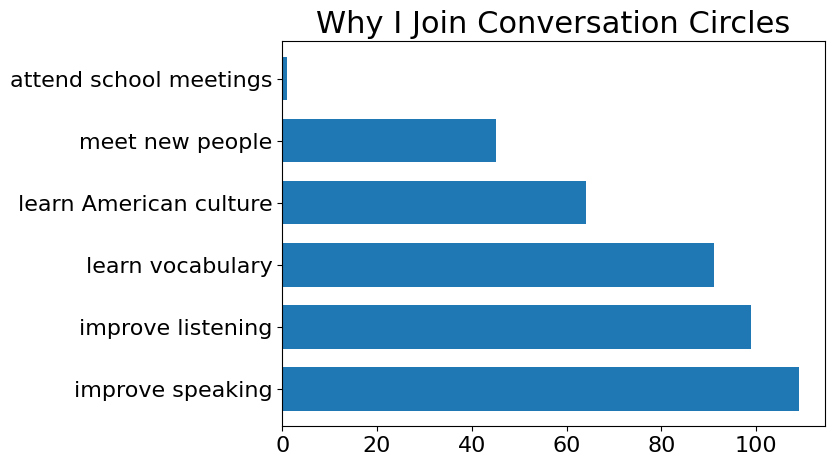

In [77]:
#Plot the gpals column of df
goals_plot=df_goals.plot.barh(x="goals", y="value",title="Why I Join Conversation Circles", fontsize=16, rot=0,figsize=(7,5),width=0.7, legend=None)
goals_plot.set_title("Why I Join Conversation Circles", fontdict={'fontsize':22})
goals_plot.set_ylabel('')

In [87]:
#Group data by source
source=df.groupby("source")["source"].count()
print(source)

source
Classroom presenter                              9
Conversation Circles flyer in my classroom       9
ESL Consultant                                   7
My ELA teacher                                  70
Other: career counselor                          5
Other: friend                                    2
Other: wife                                      1
WRSA coach during an ELA Support appointment    16
Name: source, dtype: int64


In [88]:
#Create a df and name columns
source_df=pd.DataFrame(source).rename(columns={"source":"value"})
# source_df=source_df.sort_values("value", ascending=True)
source_df = source_df.reset_index()

In [89]:
source_df

,source,value
0,Classroom presenter,9
1,Conversation Circles flyer in my classroom,9
2,ESL Consultant,7
3,My ELA teacher,70
4,Other: career counselor,5
5,Other: friend,2
6,Other: wife,1
7,WRSA coach during an ELA Support appointment,16


In [90]:
# Sort df by value in descending order
source_df=source_df.sort_values("value", ascending=False)
source_df

,source,value
3,My ELA teacher,70
7,WRSA coach during an ELA Support appointment,16
0,Classroom presenter,9
1,Conversation Circles flyer in my classroom,9
2,ESL Consultant,7
4,Other: career counselor,5
5,Other: friend,2
6,Other: wife,1


<function matplotlib.pyplot.show(close=None, block=None)>

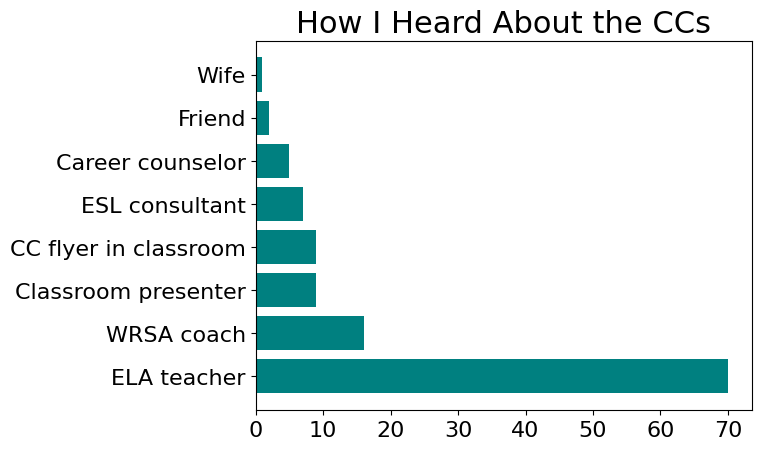

In [92]:
# Plot source column of the DF
import numpy as np
import matplotlib.pyplot as plt
source=["ELA teacher", "WRSA coach", "Classroom presenter","CC flyer in classroom","ESL consultant", "Career counselor", "Friend", "Wife"]
value=[70,16,9,9,7,5,2,1]
plt.barh(source, value, color="teal")
plt.title("How I Heard About the CCs", fontsize=22)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show


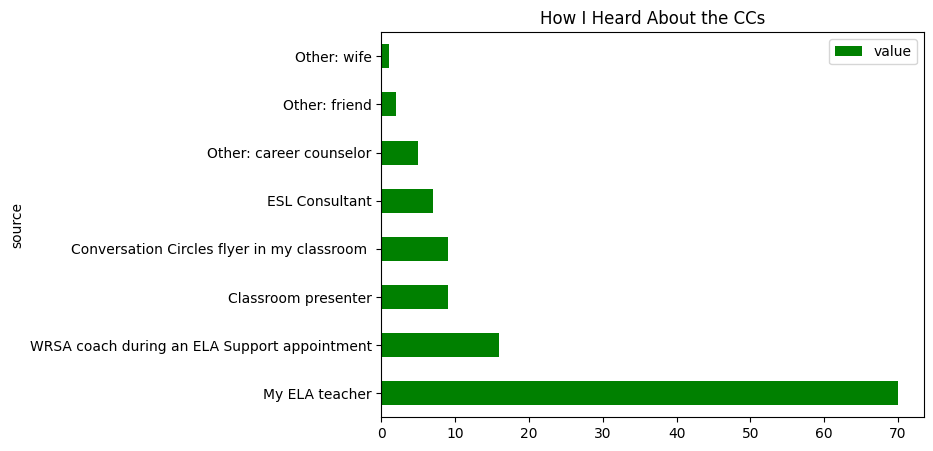

In [93]:


plot=source_df.plot.barh(x="source", y="value", rot=
                         0, figsize=(7,5), color = "green", title="How I Heard About the CCs")


In [97]:
#Create a function to iterate through strings in "favorute_activity" column and count true values
def activities(text):
# Count variable to keep track of True values
    count_true_values = 0

# Value to check
    value_to_check = text

# Iterate through the 'goal' column
    for value in df['favorite_activity']:
      if value_to_check in value:
        count_true_values += 1

    print(value_to_check,count_true_values)

In [98]:
questions=activities("Answering")
words=activities("Learning")
group=activities("Group activity")
videos=activities("Watching")
games=activities("Games")


Answering 99
Learning 89
Group activity 39
Watching 72
Games 22


In [99]:
#Combine the activities in a df with activities as values in a column
df_activities=pd.DataFrame({"fav_activity":["Answering questions", "Learning new words", "Group activity w/o facilitator","Watching and discussing videos",
"Games"], 'count':[99,89,39,72,22]}).sort_values("count", ascending=False)

In [100]:
df_activities

,fav_activity,count
0,Answering questions,99
1,Learning new words,89
3,Watching and discussing videos,72
2,Group activity w/o facilitator,39
4,Games,22


<function matplotlib.pyplot.show(close=None, block=None)>

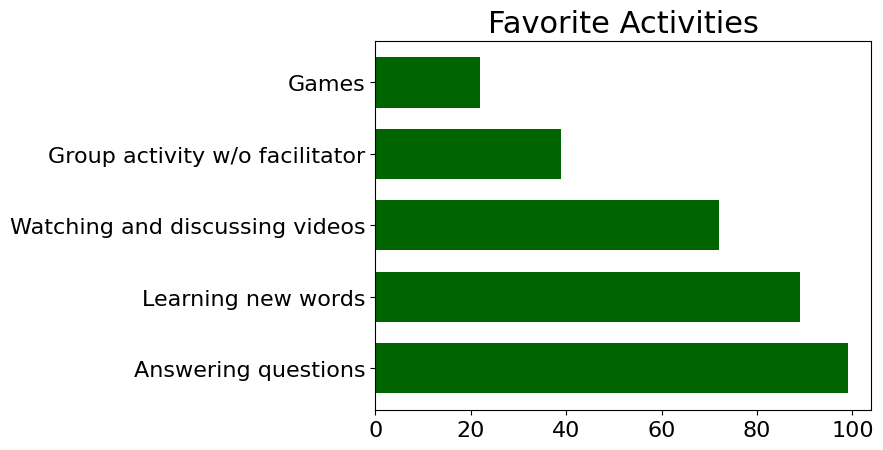

In [101]:
#Plot Favotite_activity column of the DF
plt.barh(df_activities["fav_activity"], df_activities["count"], color="darkgreen", height=0.7)
plt.title("Favorite Activities",fontsize=22)
plt.ylabel("")
plt.yticks(fontsize="16")
plt.xticks(fontsize="16")

plt.show

In [102]:
#Group DF by type of the Conversation Circle
CC=df.groupby("type")["type"].count()
CC

type
Both                14
In-person           38
In-person;Online     7
Online              60
Name: type, dtype: int64

In [104]:
df_CC=pd.DataFrame({"CC format":["Online", "In-person", "Both"], 'count':[60,38,21]}).sort_values("count", ascending=False)
df_CC

,CC format,count
0,Online,60
1,In-person,38
2,Both,21


<function matplotlib.pyplot.show(close=None, block=None)>

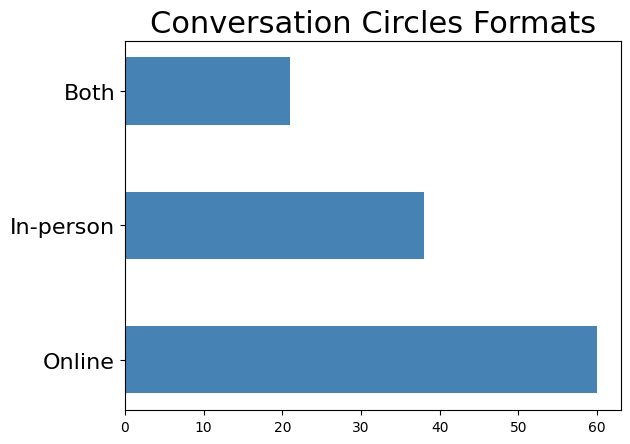

In [105]:
plt.barh(df_CC["CC format"], df_CC["count"], height=0.5,color="steelblue")
plt.title("Conversation Circles Formats", fontsize=22)
plt.yticks(fontsize=16)
plt.figsize=(2,2)


plt.show

In [106]:
df_CC=pd.DataFrame({'count':[60,38,21]}, index=["Online", "In-person", "Both"]).sort_values("count", ascending=False)
df_CC

,count
Online,60
In-person,38
Both,21


Text(0, 0.5, '')

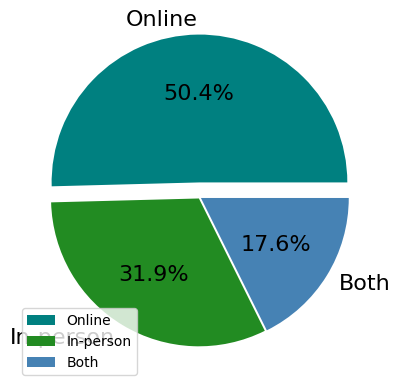

In [107]:

colors=["teal","forestgreen","steelblue"]
explode = (0.1, 0.01, 0.01,)
pie=df_CC.plot(kind='pie', y="count",colors=colors, legend='type', explode=explode, fontsize=16, autopct='%1.1f%%')
pie.set_ylabel('')


In [ ]:
plt.savefig('pie_chart.pdf')

<Figure size 640x480 with 0 Axes>

# New Section

# New Section